# Аналитика в авиакомпании F9

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. 
* * * * *
[1. Открыть файлы с данными и изучить общую информацию](#1)
- импорт данных;
- изучение общей информации;
- проверить тип данных на корректность;
- проверка на наличие дубликатов.

[2. Предобработка данных (при необходимости):](#2)

[3. Провести исследовательский анализ данных:](#3)

- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

[4. Написать общий вывод](#4)

<a id="1"></a>
### Шаг 1. Открыть файлы с данными и изучить общую информацию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
from scipy import stats as st

df1 = pd.read_csv('/datasets/query_1.csv')
df3 = pd.read_csv('/datasets/query_3.csv')

for data in [df1, df3]:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [ ]:
for data in [df1, df3]:
    display(data.head())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Проверим есть ли в данных дубликаты в таблицах

In [ ]:
for data in [df1, df3]: 
    print('Количество дубликатов в таблице:', data.duplicated().sum(), end='\n\n')

Количество дубликатов в таблице: 0

Количество дубликатов в таблице: 0



**Описание данных:**

**Таблица `df1` (результат первого запроса):**
- model — модель самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**Таблица `df3` (результат третьего запроса):**
- city — город
- average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

### Вывод:
1. Таблица `df1`: 
    - содержит информацию о модели самолета и количестве рейсов для каждой модели в сентябре 2018 года;
    - дубликатов нет;
    - пропущенных значения нет;
    - тип данных корректный (у столбца model - object, у flights_amount - int64)
<br><br>
2. Таблица `df3`:
    - содержит информацию о городе прибытия и среднем количестве рейсов, прибывающих в данный город за день в августе 2018 года;
    - дубликатов нет;
    - пропущенных значения нет;
    - тип данных корректный (у столбца city - object, у average_flights - float64)

<a id="2"></a>
### Шаг 2. Предобработка данных (при необходимости).

В нашем случае в предобработке данных нет необходимости, т.к. в данных нет пропусков, дубликатов и тип данных у столбцов корректный.

<a id="3"></a>
### Шаг 3. Провести исследовательский анализ данных.

**Выберем топ-10 городов по количеству рейсов**

In [ ]:
top10 = df3.sort_values(by='average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**Вывод:** 
- По среднему числу рейсов в сутки с большим отрывом лидирует Москва, что вполне логично, ведь из регионов за границу можно улететь в основном с пересадкой в Москве, также Москва популярна с точки зрения туризма;
- В Москву летают примерно в четыре раза чаще, чем в Санкт-Петербург.

**Построим график модели самолетов и количества рейсов**

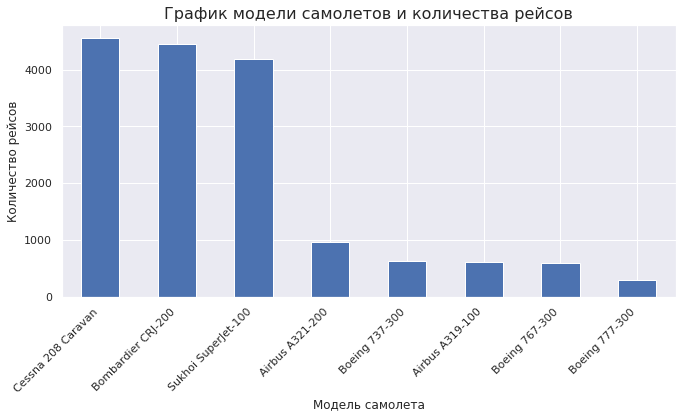

In [ ]:
df1 = df1.sort_values(by='flights_amount', ascending=False)
df1.plot(x="model", y='flights_amount', kind='bar', legend=False, figsize=(11,5))
plt.title('График модели самолетов и количества рейсов', fontsize=16)
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
df1

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


**Вывод:**
- Достаточно интересно, что самой популярной моделью самолета является Cessna 208 Caravan (в самолете всего 10-13 мест). 
- Также хорошим спросом пользуются Bombardier и Sukhoi.
- Самолеты Boeing и Airbus летают реже.

**Построим график города и количества рейсов**

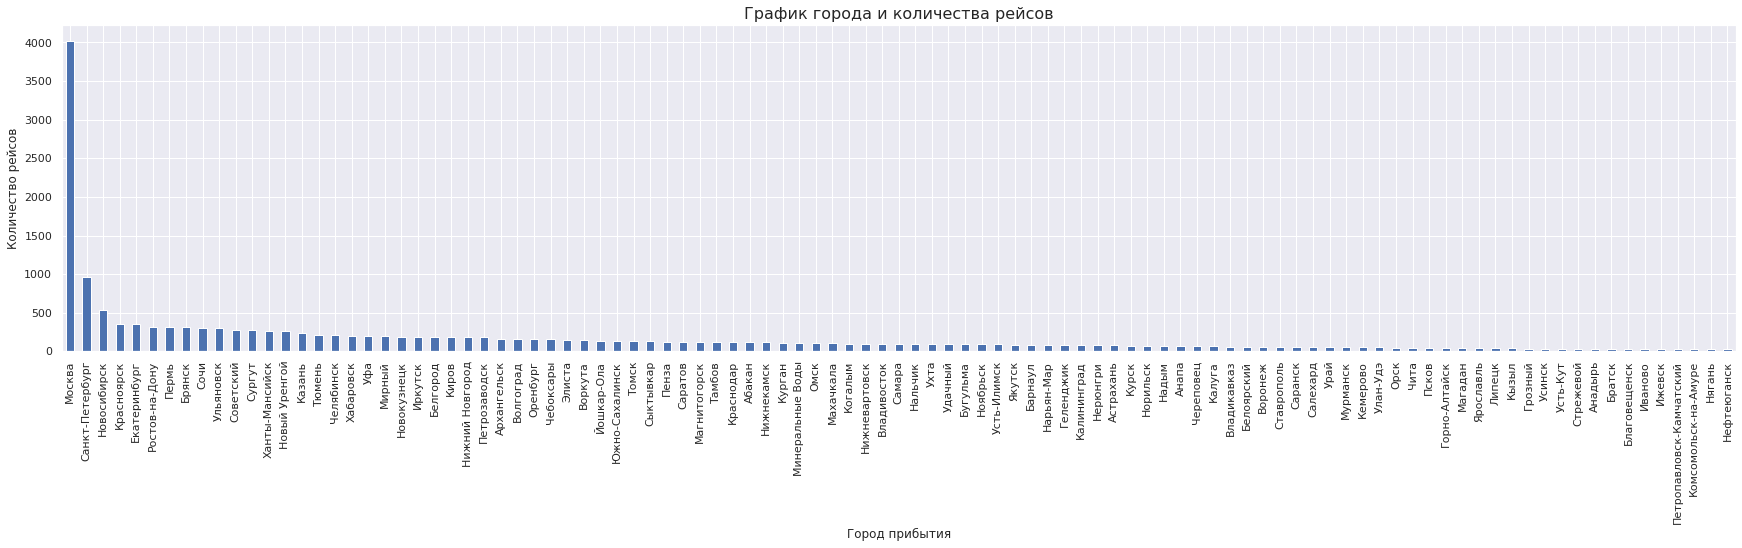

In [ ]:
df3['flights_amount'] = df3['average_flights'] * 31 #т.к. в августе 31 день
df3 = df3.sort_values(by='flights_amount', ascending=False)
df3.plot(x="city", y='flights_amount', kind='bar', legend=False, figsize=(30,6))
plt.title('График города и количества рейсов', fontsize=16)
plt.xlabel('Город прибытия')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=90, horizontalalignment='center')
plt.show()

**Вывод:**
- Подавляющее большинство рейсов приходится на Москву (около 4000 рейсов в месяц);
- На Санкт-Петербург приходится чуть менее 1000 рейсов в месяц (или в четыре раза меньше). Что вполне логично, ведь в Москве четыре крупных аэропорта (Шереметьево, Домодедово, Внуково, Жуковский), а в Питере - один (Пулково).

**Построим график топ-10 городов и количества рейсов**

Для построения графика посчитаем и добавим столбец с количеством рейсов для каждого города из топ-10.

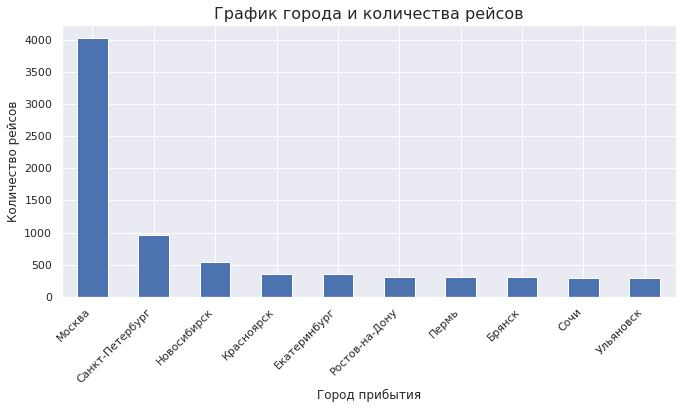

In [ ]:
top10['flights_amount'] = top10['average_flights'] * 31 #т.к. в августе 31 день
top10.plot(x="city", y='flights_amount', kind='bar', legend=False, figsize=(11,5))
plt.title('График города и количества рейсов', fontsize=16)
plt.xlabel('Город прибытия')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Выводы:**
- Выводы аналогичные - безоговорочным лидером по числу рейсов является Москва. 

<a id="4"></a>
### Шаг 4. Написать общий вывод.

**В рамках проекта были сделаны следующие выводы:**
- Были открыты и изучены таблицы df1 c информацией о модели самолета и количестве рейсов для каждой модели в сентябре 2018 года и df3 с информацией о городе прибытия и среднем количестве рейсов, прибывающих в данный город за день в августе 2018 года.
- Дубликатов, пропусков в данных нет. Типы данных также корректные
- Нашли топ-10 городов с наибольшим числом рейсов (Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск)
- Проанализировали зависимость количества рейсов от города прилета и с большим отрывом лидирует Москва (около 4000 рейсов в месяц), на втором месте - Санкт-Петербург (чуть меньше 1000 рейсов в месяц). Это может быть объяснено тем, что:
    - В Москве четыре гражданских аэропорта (Домодедово, Шереметьево, Внуково, Жуковский), поэтому есть возможность принимать большее количество рейсов, чем в Санкт-Петербург (Пулково);
    - У Москвы помимо внутренних рейсов есть большое количество международных направлений и жители регионов часто летят со стыковкой в Москве.
- Проанализировали зависимость количества рейсов от модели самолета:
    - Достаточно интересно, что самый популярной моделью оказалась Cessna 208 Caravan (самолет на 10-13 пассажиров). Скорее всего самолет пользуется спросом для поездок в регионах, в сложных условиях (грунт, короткая взлетная полоса и т.д.);
    - Следующими по популярности моделями являются Bombardier CRJ-20 и Sukhoi Superjet-100;
    - Существенной разницы в количестве рейсов между Boeing и Airbus нету.